In [2]:
import matplotlib
%matplotlib inline

from visual import Visual



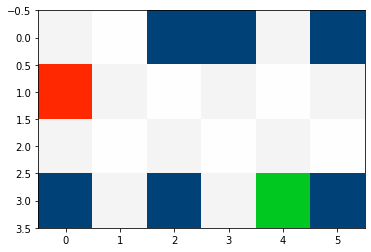


Length of final Q-table = 6
Final Q-table with values from the final route:
               0         1    2         3
(0, 1)  0.000000  0.000000  0.0 -0.990000
(1, 1)  0.000000  0.000000 -0.9  0.000000
(1, 2) -0.900000  0.000000  0.0  0.647136
(2, 2)  0.000000  0.000000  0.0  0.767637
(2, 3)  0.588305  0.000000  0.0  0.899951
(2, 4)  0.000000  0.999999  0.0  0.000000

Length of full Q-table = 17
Full Q-table:


,0,1,2,3
start,0.000000,-0.900000,0.0,0.000000
"(0, 0)",0.000000,-0.999900,0.0,0.000000
"(0, 1)",0.000000,0.000000,0.0,-0.990000
obstacle,0.000000,0.000000,0.0,0.000000
"(1, 1)",0.000000,0.000000,-0.9,0.000000
"(1, 2)",-0.900000,0.000000,0.0,0.647136
"(1, 3)",0.000000,0.808558,0.0,0.000000
"(1, 4)",0.000000,0.000000,0.0,0.000000
"(1, 5)",-0.900000,0.000000,0.0,0.000000
"(2, 3)",0.588305,0.000000,0.0,0.899951


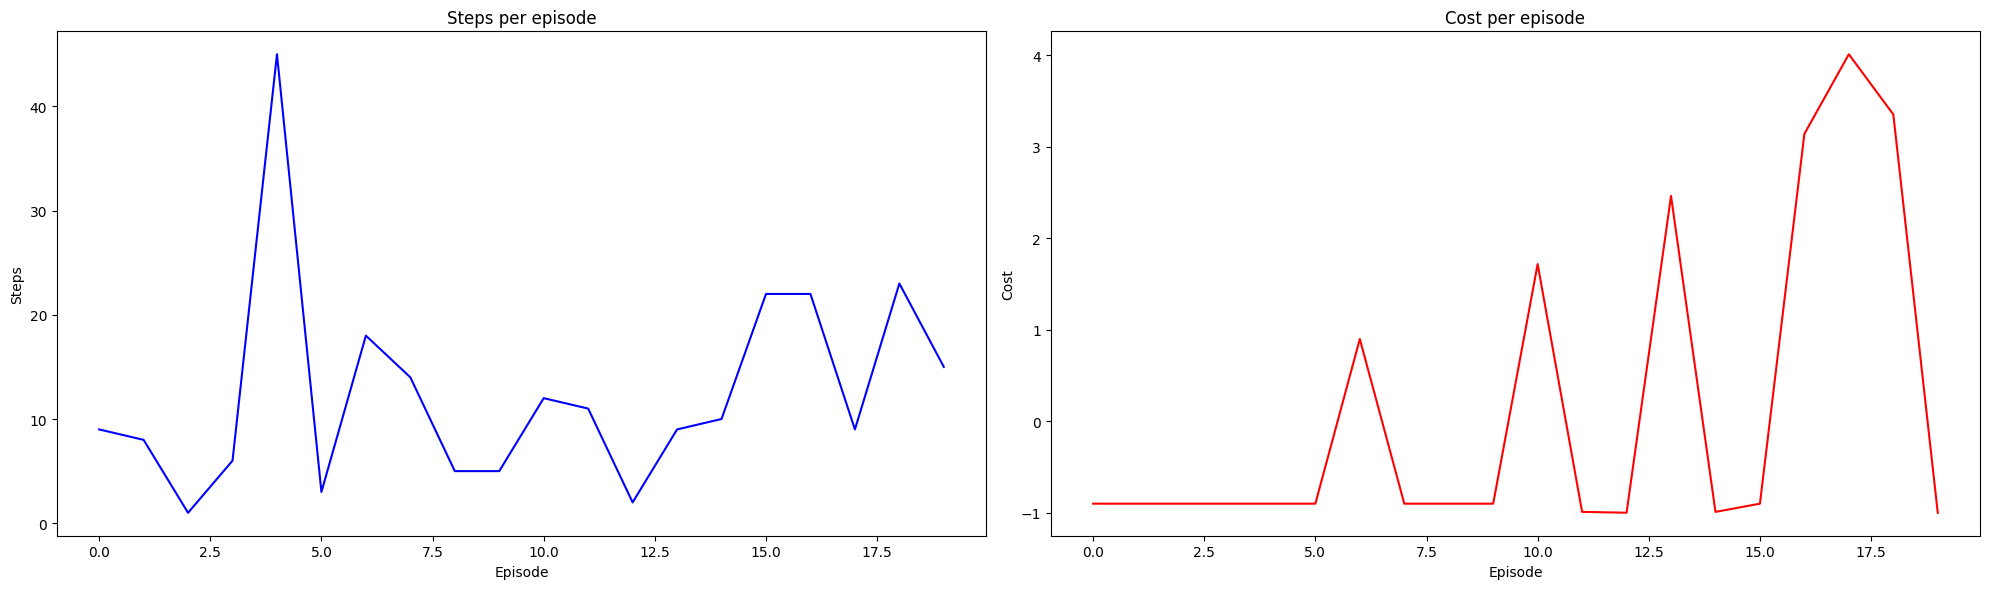

In [3]:

from main_loop import run_example

vis = Visual()
grid = (4, 6)
episodes=20
run_example(grid, episodes, vis=vis)
